# GitHub API

In [1]:
import configparser
import json
from IPython import display
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Read the GitHub API Token

This is an example of reading a configuration file using the `configparser` module.

In [2]:
home = str(Path.home() / 'github_api.ini')
config = configparser.ConfigParser()
config.read(home)
token = config['github']['token']

## Call the GitHub API to get a list of repositories

This uses the `requests` module to get data from the GitHub API and then deserializes the response using the `json` module.

In [3]:
url = "https://api.github.com/orgs/nunit/repos?per_page=25"

headers = {
  'Authorization': 'token ' + token,
  'Accept': 'application/json'
}

response = requests.request("GET", url, headers=headers)

repos = json.loads(response.text)

## Load the data into a DataFrame

The GitHub API returns more information than we want to display, ignore most of it, then create a `pandas` `DataFrame` from the data.

In [5]:
ignored_columns = ['id','node_id','full_name','owner','html_url','fork','forks_url','mirror_url','keys_url',
                   'collaborators_url','teams_url','hooks_url','issue_events_url','events_url','assignees_url',
                   'branches_url','tags_url','blobs_url','git_tags_url','git_refs_url','trees_url','statuses_url',
                   'languages_url','stargazers_url','contributors_url','subscribers_url','subscription_url',
                   'commits_url','git_commits_url','comments_url','issue_comment_url','contents_url','compare_url',
                   'merges_url','archive_url','downloads_url','issues_url','pulls_url','milestones_url',
                   'notifications_url','labels_url','releases_url','deployments_url','git_url','ssh_url','clone_url',
                   'license','forks_count','size','default_branch','permissions','has_downloads','has_wiki',
                   'has_pages','archived','disabled','has_issues','has_projects','open_issues_count', 'pushed_at',
                   'svn_url','homepage','url','stargazers_count']

df = pd.DataFrame(repos).drop(columns=ignored_columns)

df

,name,private,description,created_at,updated_at,watchers_count,language,forks,open_issues,watchers
0,nunit-csharp-samples,False,Samples of NUnit Usage in C#,2012-10-29T21:51:20Z,2020-02-12T12:45:44Z,170,C#,128,1,170
1,nunit-fsharp-samples,False,Samples of NUnit Usage in F#,2012-11-01T18:43:14Z,2019-06-11T22:03:00Z,5,F#,4,0,5
2,nunit-vb-samples,False,Samples of NUnit Usage in Visual Basic .NET,2012-11-01T18:44:23Z,2019-06-11T22:03:00Z,5,Visual Basic,5,1,5
3,nunit-cpp-samples,False,Samples of NUnit usage in C++,2012-11-01T18:45:12Z,2019-08-20T09:56:21Z,6,C++,9,2,6
4,nunitlite,False,None,2013-09-13T21:12:36Z,2018-05-18T03:10:57Z,13,C#,12,2,13
5,nunit-vs-adapter,False,Runs NUnit V2 tests inside the Visual Studio 2...,2013-10-07T02:09:46Z,2019-11-06T00:13:24Z,47,C#,38,41,47
6,nunitv2,False,NUnit 2.x repository. NUnit V2 IS NO LONGER MA...,2013-10-11T06:14:25Z,2019-10-24T11:41:30Z,25,C#,28,2,25
7,nunit,False,NUnit 3 Framework,2013-10-18T23:43:29Z,2020-02-25T17:11:23Z,1807,C#,597,428,1807
8,nunit.org,False,The old NUnit website. Please see the new site...,2014-08-07T21:21:55Z,2017-11-18T18:37:46Z,1,PHP,2,0,1
9,nunit3-vs-adapter,False,NUnit 3.0 Visual Studio test adapter for use u...,2015-03-22T17:22:38Z,2020-02-19T11:22:55Z,131,C#,79,70,131


## Let's try some visualizations

Look at a few ways to plot data using `pandas`

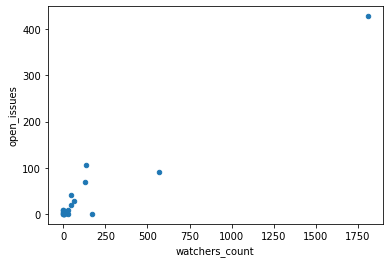

In [6]:
df.plot(kind='scatter',x='watchers_count',y='open_issues')
plt.show()

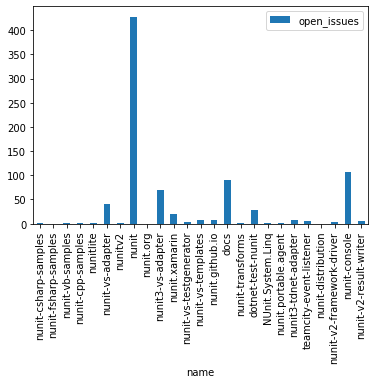

In [7]:
df.plot(kind='bar',x='name',y='open_issues')
plt.show()